# Mushrooms!

Data source: https://www.kaggle.com/uciml/mushroom-classification

Attempting to 
 - build a classification model to determine if mushrooms are edible
 - determine which machine learning algorithm models the data best
 - determine which feature in the data is most important in determining whether a mushroom is poisonous 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [313]:
data = pd.read_csv("data\mushrooms.csv")

In [314]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

8124 instances, no missing/null data

In [4]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# Exploratory Analysis

In [5]:
overview=data.describe()
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


All columns are descriptive - no numerical data at all


In [6]:
overview[overview==1].loc["unique"]
# veil-type feature is useless, we can drop it

class                       NaN
cap-shape                   NaN
cap-surface                 NaN
cap-color                   NaN
bruises                     NaN
odor                        NaN
gill-attachment             NaN
gill-spacing                NaN
gill-size                   NaN
gill-color                  NaN
stalk-shape                 NaN
stalk-root                  NaN
stalk-surface-above-ring    NaN
stalk-surface-below-ring    NaN
stalk-color-above-ring      NaN
stalk-color-below-ring      NaN
veil-type                     1
veil-color                  NaN
ring-number                 NaN
ring-type                   NaN
spore-print-color           NaN
population                  NaN
habitat                     NaN
Name: unique, dtype: object

<AxesSubplot:xlabel='class', ylabel='count'>

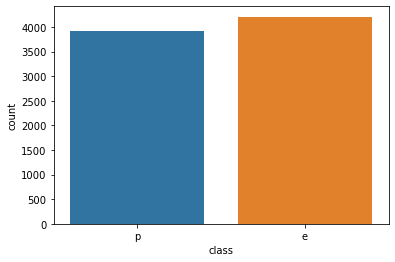

In [7]:
sns.countplot(x="class",data=data)
# fairly even split between classes

<AxesSubplot:xlabel='class', ylabel='count'>

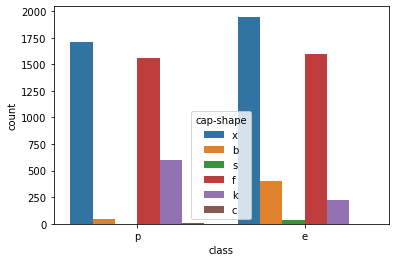

In [8]:
sns.countplot(x="class",data=data,hue="cap-shape")
# very few conical or sunken cap shapes
# very few poisonous mushrooms have a sunken shape
# very few edible mushrooms have a conical shape

<AxesSubplot:xlabel='class', ylabel='count'>

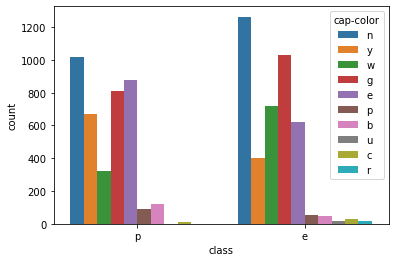

In [9]:
sns.countplot(x="class",hue="cap-color",data=data)
# very few purple, cinnamon, green mushroom caps

<AxesSubplot:xlabel='class', ylabel='count'>

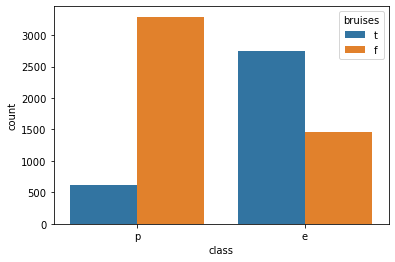

In [10]:
sns.countplot(x="class",hue="bruises",data=data)
# poisononous mushrooms are less likely to have bruises

<AxesSubplot:xlabel='class', ylabel='count'>

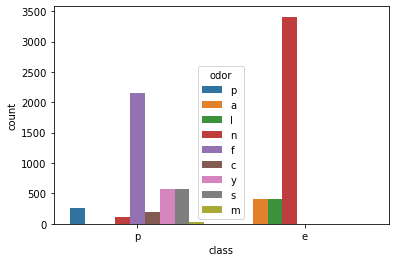

In [11]:
sns.countplot(x="class",hue="odor",data=data)
# edible mushrooms only seem to have an almond, anise or no odour
# very few poisonous mushrooms have almond or anise odour

<AxesSubplot:xlabel='class', ylabel='count'>

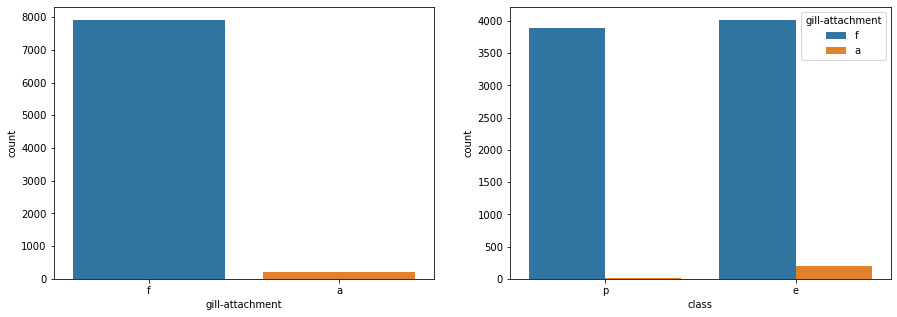

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))
sns.countplot(ax=axes[0],x="gill-attachment",data=data)
sns.countplot(ax=axes[1],x="class", hue="gill-attachment",data=data)
# almost all instances have no gill attachment, CONSIDER REMOVING FEATURE
# when gills are attached, they are more likely to be edible

<AxesSubplot:xlabel='class', ylabel='count'>

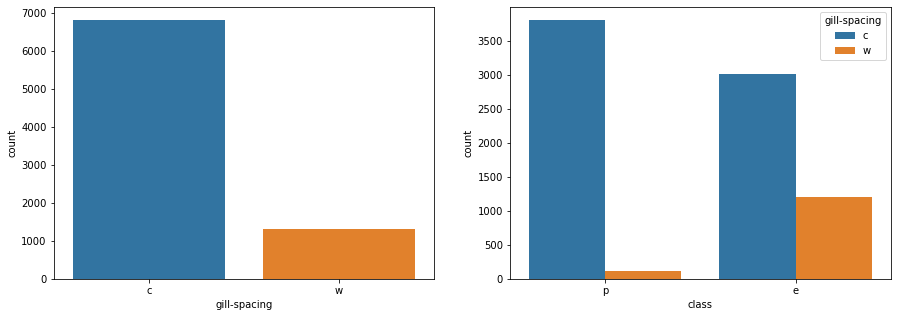

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))
sns.countplot(ax=axes[0],x="gill-spacing",data=data)
sns.countplot(x="class",hue="gill-spacing",data=data)
# the majority of instances have close gill spacing, no "distant" instances at all, consider removing
# if mushroom has crowded gill spacing, more likely to be edible

<AxesSubplot:xlabel='class', ylabel='count'>

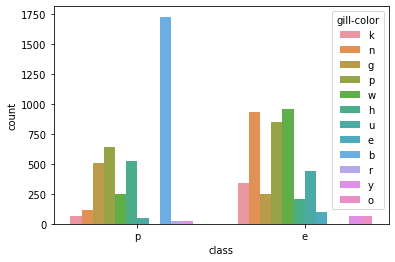

In [14]:
sns.countplot(x="class",hue="gill-color",data=data)
# the vast majority of mushrooms with buff gills are poisonous

<AxesSubplot:xlabel='class', ylabel='count'>

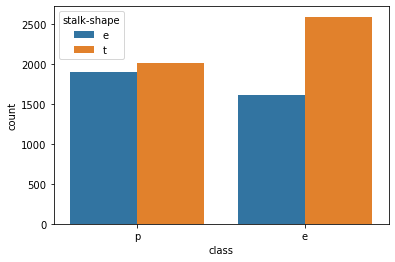

In [15]:
sns.countplot(x="class",hue="stalk-shape",data=data)
# fairly even split

<AxesSubplot:xlabel='class', ylabel='count'>

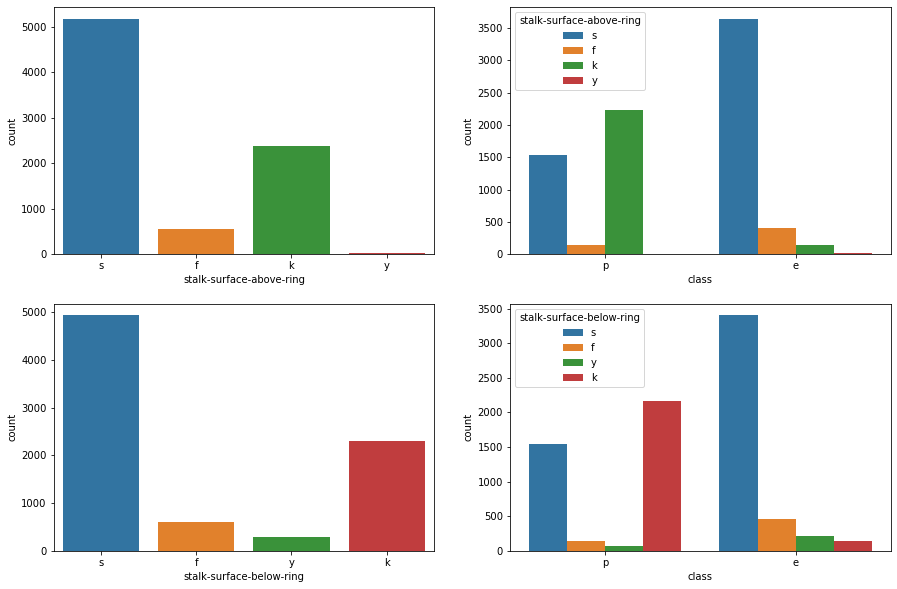

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(15,10))
sns.countplot(ax=axes[0,0],x="stalk-surface-above-ring",data=data)
sns.countplot(ax=axes[0,1],x="class",hue="stalk-surface-above-ring",data=data)
sns.countplot(ax=axes[1,0],x="stalk-surface-below-ring",data=data)
sns.countplot(ax=axes[1,1],x="class",hue="stalk-surface-below-ring",data=data)
# fairly mixed
# very few yellow above-stalk instances

<AxesSubplot:xlabel='veil-color', ylabel='count'>

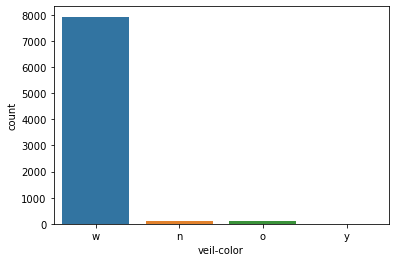

In [17]:
sns.countplot(x="veil-color",data=data)
# vast majority of veils are white, CONSIDER REMOVING

<AxesSubplot:xlabel='class', ylabel='count'>

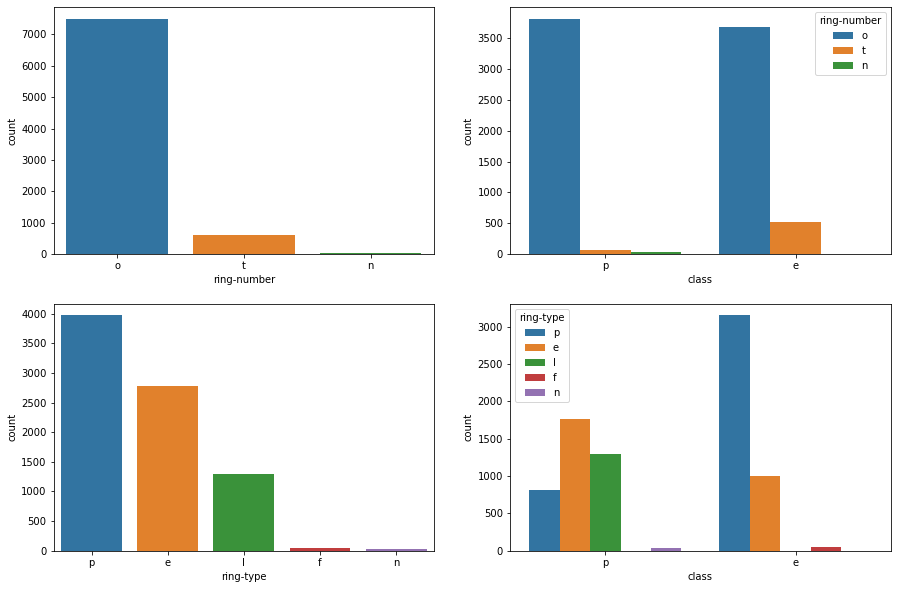

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(15,10))
sns.countplot(ax=axes[0,0],x="ring-number",data=data)
sns.countplot(ax=axes[0,1],x="class", hue="ring-number",data=data)
sns.countplot(ax=axes[1,0],x="ring-type",data=data)
sns.countplot(ax=axes[1,1],x="class", hue="ring-type",data=data)
# majority of instances have one ring, possibly worth removing - test
# edible mushrooms more likely to have two rings
# poisonous mushrooms more likely to have no rings
# fairly mixed ring types, quite few flairing and none types

<AxesSubplot:xlabel='class', ylabel='count'>

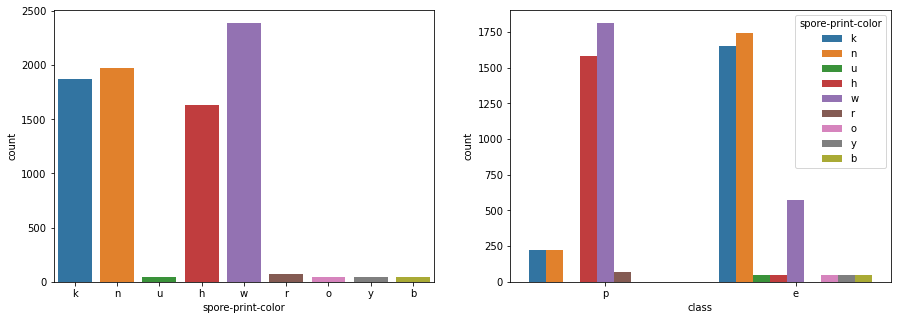

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))
sns.countplot(ax=axes[0],x="spore-print-color",data=data)
sns.countplot(ax=axes[1],x="class", hue="spore-print-color",data=data)
#fairly mixed

<AxesSubplot:xlabel='class', ylabel='count'>

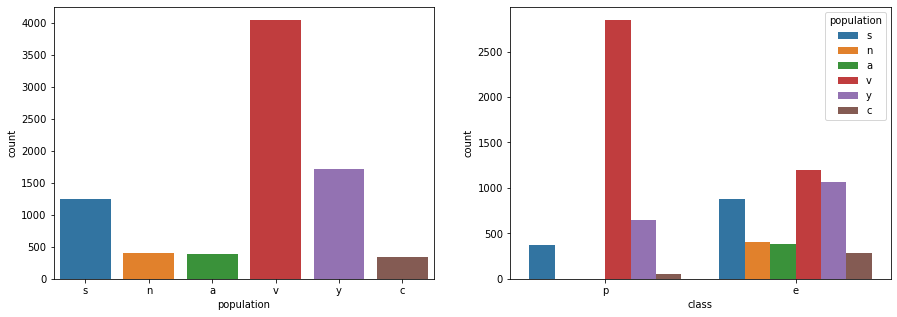

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))
sns.countplot(ax=axes[0],x="population",data=data)
sns.countplot(ax=axes[1],x="class", hue="population",data=data)
# fairly mixed populations, numerous and abundant populations seem to indicate edible

<AxesSubplot:xlabel='class', ylabel='count'>

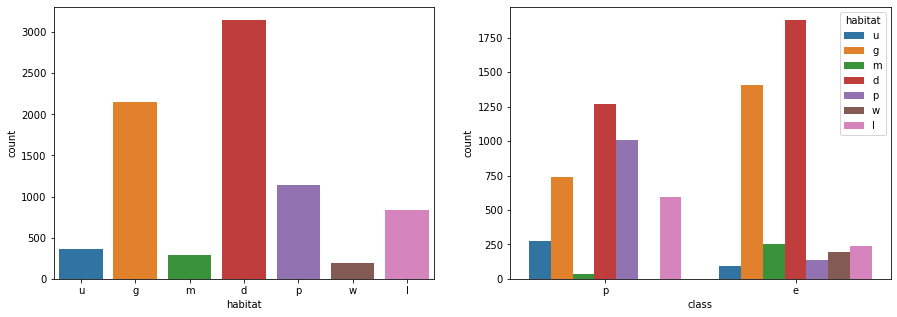

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))
sns.countplot(ax=axes[0],x="habitat",data=data)
sns.countplot(ax=axes[1],x="class", hue="habitat",data=data)
# fairly mixed habitats

Useless features: gill-attachment, veil-type  #WRONG gill-attachment was useful, look at skewing in the data

Less useful features: veil-color

Consider for both: gill-spacing

# Data Preparation and Splitting

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [106]:
# Removed gill-attachment and veil-type features
X = data[['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']]
y = data['class']

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [108]:
# experimenting with different encoding methods
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
ordinal_encoder = OrdinalEncoder()
hot_encoder = OneHotEncoder()

In [109]:
orddata_train = ordinal_encoder.fit_transform(X_train)
hotdata_train = hot_encoder.fit_transform(X_train)
orddata_test = ordinal_encoder.fit_transform(X_test)
hotdata_test = hot_encoder.fit_transform(X_test)

# Models

**Model 1 - Logistic Regression**

In [110]:
from sklearn.linear_model import LogisticRegression

In [111]:
log_reg_ord = LogisticRegression(max_iter=500)
log_reg_hot = LogisticRegression(max_iter=500)
log_reg_ord.fit(orddata_train,y_train)
log_reg_hot.fit(hotdata_train,y_train)

LogisticRegression(max_iter=500)

In [112]:
predict_ord = log_reg_ord.predict(orddata_test)
predict_hot = log_reg_hot.predict(hotdata_test)

In [113]:
from sklearn.metrics import classification_report,confusion_matrix

In [114]:
# from context, we should prioritise
print(classification_report(y_test,predict_ord))

              precision    recall  f1-score   support

           e       0.95      0.95      0.95      1378
           p       0.95      0.95      0.95      1303

    accuracy                           0.95      2681
   macro avg       0.95      0.95      0.95      2681
weighted avg       0.95      0.95      0.95      2681



In [119]:
# One hot encoder achieves 100% accuracy on this set, possibly overfitting
print(classification_report(y_test,predict_hot))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1378
           p       1.00      1.00      1.00      1303

    accuracy                           1.00      2681
   macro avg       1.00      1.00      1.00      2681
weighted avg       1.00      1.00      1.00      2681



In [123]:
log_reg_hot.classes_

array(['e', 'p'], dtype=object)

In [129]:
# if no labels are given to confusion matrix, matrix indices represent existing classes sorted in order (same as classes_ attribute) 
# positive class is "poisonous"
# from context, we should aim to minimise False Negatives (labeling a poisonous mushroom as edible)
confusion_matrix(y_test,predict_ord)
# predicted 69 mushrooms were edible that were poisonous

array([[1313,   65],
       [  69, 1234]], dtype=int64)

In [130]:
confusion_matrix(y_test,predict_hot)

array([[1378,    0],
       [   0, 1303]], dtype=int64)

In [136]:
from sklearn.model_selection import cross_val_score, cross_val_predict

In [69]:
# using cross validation on 20 folds to determine whether model is over fitting
# seems neither model overfits to training split
ord_scores = cross_val_score(log_reg_ord, orddata_train, y_train, cv=20, scoring="accuracy")
ord_scores

array([0.96703297, 0.96336996, 0.97069597, 0.95955882, 0.95220588,
       0.93014706, 0.94485294, 0.94117647, 0.94852941, 0.94485294,
       0.94485294, 0.94852941, 0.94485294, 0.94117647, 0.96323529,
       0.94852941, 0.95588235, 0.95220588, 0.94852941, 0.95588235])

In [249]:
# a logistic regression model with one hot encoding seems to be an extremely good model
hot_scores = cross_val_score(log_reg_hot, hotdata_train, y_train, cv=20, scoring="accuracy")
hot_scores

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.99264706, 1.        , 1.        ])

In [253]:
hot_log_reg_predict = cross_val_predict(log_reg_hot, hotdata_train, y_train, cv=20)

In [254]:
log_reg_hot.classes_

array(['e', 'p'], dtype=object)

In [255]:
print(confusion_matrix(hot_log_reg_predict,y_train))

[[2830    2]
 [   0 2611]]


In [256]:
print(classification_report(hot_log_reg_predict,y_train))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00      2832
           p       1.00      1.00      1.00      2611

    accuracy                           1.00      5443
   macro avg       1.00      1.00      1.00      5443
weighted avg       1.00      1.00      1.00      5443



**Model 2 - Decision Tree and Random Forest**

In [59]:
from sklearn.tree import DecisionTreeClassifier

In [60]:
# one hot encoding led to better results with Logistic regression so try this first
hot_tree = DecisionTreeClassifier(max_depth=3)
hot_tree.fit(hotdata_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [61]:
hot_tree_scores = cross_val_score(hot_tree, hotdata_train, y_train, cv=20)
hot_tree_scores

array([0.98901099, 0.98534799, 0.98901099, 0.99264706, 0.98529412,
       0.98161765, 0.99264706, 0.97426471, 0.97058824, 0.98897059,
       0.98529412, 0.98897059, 0.98161765, 0.98161765, 0.98897059,
       0.98529412, 0.97058824, 0.98161765, 0.98897059, 0.99264706])

In [62]:
ord_tree = DecisionTreeClassifier(max_depth=3)
ord_tree.fit(orddata_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [133]:
# ordinal encoding again generally lead to lower scores
ord_tree_scores = cross_val_score(ord_tree, orddata_train, y_train, cv=20)
ord_tree_scores

array([0.97069597, 0.97802198, 0.97435897, 0.97426471, 0.95588235,
       0.95955882, 0.96323529, 0.9375    , 0.93382353, 0.97426471,
       0.94485294, 0.95220588, 0.95588235, 0.96323529, 0.96691176,
       0.95588235, 0.96323529, 0.94485294, 0.94852941, 0.96323529])

In [146]:
ord_tree_predict = cross_val_predict(ord_tree, orddata_train, y_train, cv=20)
hot_tree_predict = cross_val_predict(hot_tree, hotdata_train, y_train, cv=20)

In [147]:
print(confusion_matrix(ord_tree_predict,y_train))

[[2682   75]
 [ 148 2538]]


In [148]:
print(classification_report(y_train,ord_tree_predict))

              precision    recall  f1-score   support

           e       0.97      0.95      0.96      2830
           p       0.94      0.97      0.96      2613

    accuracy                           0.96      5443
   macro avg       0.96      0.96      0.96      5443
weighted avg       0.96      0.96      0.96      5443



In [149]:
# again one hot encoding produces a better classifier
print(confusion_matrix(hot_tree_predict,y_train))

[[2760   13]
 [  70 2600]]


In [151]:
print(classification_report(y_train,hot_tree_predict))

              precision    recall  f1-score   support

           e       1.00      0.98      0.99      2830
           p       0.97      1.00      0.98      2613

    accuracy                           0.98      5443
   macro avg       0.98      0.99      0.98      5443
weighted avg       0.98      0.98      0.98      5443



In [172]:
# use a grid search to find an optimised tree depth
from sklearn.model_selection import GridSearchCV

In [203]:
tree_grid = [
    {'max_depth':[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]},
]

grid_search = GridSearchCV(hot_tree, tree_grid,cv=5,return_train_score=True)

In [204]:
grid_search.fit(hotdata_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=3),
             param_grid=[{'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]}],
             return_train_score=True)

In [190]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=8)

In [266]:
# decision tree with depth of 8 and one hot encoding has similar accuracy to log_reg_hot
opt_scores = cross_val_score(DecisionTreeClassifier(max_depth=8), hotdata_train, y_train, cv=20, scoring="accuracy")
opt_scores

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.99264706, 1.        , 1.        ])

In [273]:
opt_tree_predict = cross_val_predict(DecisionTreeClassifier(max_depth=8), hotdata_train, y_train, cv=20)

In [276]:
print(confusion_matrix(opt_tree_predict,y_train))

[[2830    2]
 [   0 2611]]


In [277]:
print(classification_report(opt_tree_predict,y_train))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00      2832
           p       1.00      1.00      1.00      2611

    accuracy                           1.00      5443
   macro avg       1.00      1.00      1.00      5443
weighted avg       1.00      1.00      1.00      5443



In [193]:
from sklearn.ensemble import RandomForestClassifier

In [212]:
rnd_hot = RandomForestClassifier(n_estimators=500,max_leaf_nodes=16)
rnd_hot.fit(hotdata_train,y_train)

RandomForestClassifier(max_leaf_nodes=16, n_estimators=500)

In [199]:
rnd_hot_predict = rnd_hot.predict(hotdata_test)

In [200]:
print(confusion_matrix(rnd_hot_predict,y_test))

[[1378    4]
 [   0 1299]]


In [202]:
print(classification_report(y_test,rnd_hot_predict))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1378
           p       1.00      1.00      1.00      1303

    accuracy                           1.00      2681
   macro avg       1.00      1.00      1.00      2681
weighted avg       1.00      1.00      1.00      2681



In [234]:
# gridsearch to optimise hyperparameters
forest_grid = [
    {'n_estimators':[30,40,50,70,80,90,100],'max_leaf_nodes':[15,20,30,40]},
]
forest_search = GridSearchCV(rnd_hot, forest_grid,cv=5,return_train_score=True)

In [235]:
forest_search.fit(hotdata_train,y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_leaf_nodes=16,
                                              n_estimators=500),
             param_grid=[{'max_leaf_nodes': [15, 20, 30, 40],
                          'n_estimators': [30, 40, 50, 70, 80, 90, 100]}],
             return_train_score=True)

In [236]:
forest_search.best_params_

{'max_leaf_nodes': 20, 'n_estimators': 50}

In [279]:
opt_rnd_hot = RandomForestClassifier(n_estimators=50,max_leaf_nodes=20)
opt_rnd_hot.fit(hotdata_train,y_train)

RandomForestClassifier(max_leaf_nodes=20, n_estimators=50)

In [280]:
opt_rnd_hot_predict = opt_rnd_hot.predict(hotdata_test)

In [281]:
opt_rnd_hot_predict = cross_val_predict(opt_rnd_hot, hotdata_train, y_train, cv=20)

In [282]:
print(confusion_matrix(y_train,opt_rnd_hot_predict))

[[2830    0]
 [   0 2613]]


In [265]:
print(classification_report(y_train,opt_rnd_hot_predict))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00      2830
           p       1.00      1.00      1.00      2613

    accuracy                           1.00      5443
   macro avg       1.00      1.00      1.00      5443
weighted avg       1.00      1.00      1.00      5443



# Summary

After transforming the data via One-Hot Encoding, there are various algorithms that produce a near perfect performance. However, from the context of the data, we should prioritise recall over precision which means aiming to minimise False Negatives. As a result, the Random Forest model seems to be the best.

In [284]:
final_pred = opt_rnd_hot.predict(hotdata_test)

In [286]:
print(confusion_matrix(final_pred,y_test))

[[1378    0]
 [   0 1303]]


In [287]:
print(classification_report(final_pred,y_test))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1378
           p       1.00      1.00      1.00      1303

    accuracy                           1.00      2681
   macro avg       1.00      1.00      1.00      2681
weighted avg       1.00      1.00      1.00      2681



In [288]:
opt_rnd_hot.feature_importances_

array([2.02023894e-03, 5.11417586e-05, 8.99284111e-04, 2.52316987e-04,
       4.87657772e-04, 5.15999462e-04, 7.77833927e-03, 1.68343292e-05,
       3.23608750e-03, 1.45925955e-03, 1.94282589e-03, 4.23137853e-04,
       1.28495406e-03, 6.74594194e-04, 3.29811603e-04, 2.47455112e-03,
       0.00000000e+00, 1.25952083e-04, 2.82969309e-03, 6.97535393e-03,
       1.85954071e-02, 1.38158098e-02, 4.89274704e-03, 1.19575457e-02,
       6.98272086e-02, 1.62473673e-03, 1.20533847e-03, 1.21110215e-01,
       1.58323765e-02, 6.48195764e-03, 9.37372019e-03, 1.63490025e-02,
       1.85914366e-02, 6.57330976e-02, 7.21742966e-02, 3.28518742e-02,
       0.00000000e+00, 2.90476241e-04, 5.82037848e-04, 1.42280107e-04,
       7.95229715e-04, 0.00000000e+00, 9.38629578e-05, 2.15677209e-03,
       3.33720625e-04, 1.99736562e-03, 2.02185503e-04, 1.11962507e-02,
       1.07625572e-02, 7.95668810e-03, 7.92226944e-03, 5.37852975e-03,
       1.15440063e-02, 2.03358317e-04, 6.90693748e-04, 5.03603664e-02,
      

In [291]:
cols= data.columns

In [308]:
dummied_data = pd.get_dummies(data,cols,drop_first = False)

In [309]:
D_train, D_test, y_train_1, y_test_1 = train_test_split(dummied_data, y, test_size=0.33, random_state=42)

In [310]:
rndfor = RandomForestClassifier(n_estimators=50,max_leaf_nodes=20)
rndfor.fit(D_train,y_train_1)

RandomForestClassifier(max_leaf_nodes=20, n_estimators=50)

In [312]:
for name,score in zip(dummied_data.columns,rndfor.feature_importances_):
    print(name,score)

class_e 0.18626560066802844
class_p 0.14176679030179246
cap-shape_b 0.0
cap-shape_c 9.619149203481712e-06
cap-shape_f 0.00024111599712202416
cap-shape_k 0.0005527902761039274
cap-shape_s 0.0004262441190660972
cap-shape_x 0.000161029123003124
cap-surface_f 0.002096855352248682
cap-surface_g 9.009839858774429e-05
cap-surface_s 0.0026745567520374673
cap-surface_y 0.002143859526499068
cap-color_b 0.0003079539423018815
cap-color_c 0.0003126760845391811
cap-color_e 0.0010254167686226555
cap-color_g 0.0002120456990492654
cap-color_n 0.00010166236987925644
cap-color_p 0.0006523554273012117
cap-color_r 0.0
cap-color_u 0.0
cap-color_w 0.0010391113410239319
cap-color_y 0.003131101753201708
bruises_f 0.01680327632968999
bruises_t 0.00588099747215024
odor_a 0.002117349028210976
odor_c 0.005461543271101206
odor_f 0.03216283014656546
odor_l 0.0030476406057689913
odor_m 0.0
odor_n 0.07862884687811703
odor_p 0.006253374112193872
odor_s 0.0
odor_y 0.0056031818484444966
gill-attachment_a 0.0
gill-attachm